# Ejercicio 3

**Para este ejercicio tomaremos de nuevo el data set llamado "Boston" del paquete MASS. Intentaremos predecir el valor de medio de las viviendas de un barrio (medv) en función de otras variables, como el número promedio de habitaciones de la vivienda (rm), nivel de contaminación (nox), etc. Lo haremos a partir de una regresión multivariable.**

**This data frame contains the following columns:** 

crim: per capita crime rate by town. 

zn: proportion of residential land zoned for lots over 25,000 sq.ft. 

indus: proportion of non-retail business acres per town. 

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). 

nox: nitrogen oxides concentration (parts per 10 million). 

rm: average number of rooms per dwelling. 

age: proportion of owner-occupied units built prior to 1940. 

dis: weighted mean of distances to five Boston employment centres. 

rad: index of accessibility to radial highways. 

tax: full-value property-tax rate per $10,000. 

ptratio: pupil-teacher ratio by town. 

black: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town. 

lstat: lower status of the population (percent). 

medv: median value of owner-occupied homes in $1000s.

In [1]:
library('leaps')
library('splines')
library('visreg')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
Boston <- read.csv(file="Boston_data.csv", sep=",", head=TRUE)
attach(Boston)
names(Boston)

[1] "X"       "crim"    "zn"      "indus"   "chas"    "nox"     "rm"     
 [8] "age"     "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"  
[15] "medv"

In [3]:
summary(Boston)

       X              crim                zn             indus      
 Min.   :  1.0   Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46  
 1st Qu.:127.2   1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19  
 Median :253.5   Median : 0.25651   Median :  0.00   Median : 9.69  
 Mean   :253.5   Mean   : 3.61352   Mean   : 11.36   Mean   :11.14  
 3rd Qu.:379.8   3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10  
 Max.   :506.0   Max.   :88.97620   Max.   :100.00   Max.   :27.74  
      chas              nox               rm             age        
 Min.   :0.00000   Min.   :0.3850   Min.   :3.561   Min.   :  2.90  
 1st Qu.:0.00000   1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02  
 Median :0.00000   Median :0.5380   Median :6.208   Median : 77.50  
 Mean   :0.06917   Mean   :0.5547   Mean   :6.285   Mean   : 68.57  
 3rd Qu.:0.00000   3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08  
 Max.   :1.00000   Max.   :0.8710   Max.   :8.780   Max.   :100.00  
      dis              rad        

**1) Utilizando la función regsubsets (del paquete leaps), comprueba qué variables deberíamos escoger si queremos un modelo lineal con únicamente 5 variables independientes.**

In [4]:
reg1 <- regsubsets(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat, 
  data = Boston, nvmax = 5)

In [5]:
summary(reg1)

Subset selection object
Call: regsubsets.formula(medv ~ crim + zn + indus + chas + nox + rm + 
    age + dis + rad + tax + ptratio + black + lstat, data = Boston, 
    nvmax = 5)
13 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
black       FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         crim zn  indus chas nox rm  age dis rad tax ptratio black lstat
1  ( 1 ) " "  " " " "   " "  " " " " " " " " " " " " " "     " "   "*"  
2  ( 1 ) " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   "*"  
3  ( 1 ) " "  " " " "   " "  " " "*" " " " " " " " " "*"     " "   "*"  
4  ( 1 ) " "  " " " "   " "  "

**2) Una vez escogidas las 5 variables que dan un mejor resultado, comprueba si existe correlación y colinearidad entre ellas. ¿Crees que se debería excluir alguna?**

In [6]:
fit = lm(medv~rm + ptratio + lstat, data=Boston)
summary(fit)


Call:
lm(formula = medv ~ rm + ptratio + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4871  -3.1047  -0.7976   1.8129  29.6559 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.56711    3.91320   4.745 2.73e-06 ***
rm           4.51542    0.42587  10.603  < 2e-16 ***
ptratio     -0.93072    0.11765  -7.911 1.64e-14 ***
lstat       -0.57181    0.04223 -13.540  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.229 on 502 degrees of freedom
Multiple R-squared:  0.6786,	Adjusted R-squared:  0.6767 
F-statistic: 353.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [7]:
fit = lm(medv~rm + dis + ptratio + lstat, data=Boston)
summary(fit)


Call:
lm(formula = medv ~ rm + dis + ptratio + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4172  -3.0971  -0.6397   1.8727  27.1088 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.47136    4.07802   6.001 3.77e-09 ***
rm           4.22379    0.42382   9.966  < 2e-16 ***
dis         -0.55193    0.12695  -4.348 1.67e-05 ***
ptratio     -0.97365    0.11603  -8.391 4.94e-16 ***
lstat       -0.66544    0.04675 -14.233  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.139 on 501 degrees of freedom
Multiple R-squared:  0.6903,	Adjusted R-squared:  0.6878 
F-statistic: 279.2 on 4 and 501 DF,  p-value: < 2.2e-16


In [8]:
fit = lm(medv~nox + rm + dis + ptratio + lstat, data=Boston)
summary(fit)


Call:
lm(formula = medv ~ nox + rm + dis + ptratio + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7765  -3.0186  -0.6481   1.9752  27.7625 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.49920    4.61295   8.129 3.43e-15 ***
nox         -17.99657    3.26095  -5.519 5.49e-08 ***
rm            4.16331    0.41203  10.104  < 2e-16 ***
dis          -1.18466    0.16842  -7.034 6.64e-12 ***
ptratio      -1.04577    0.11352  -9.212  < 2e-16 ***
lstat        -0.58108    0.04794 -12.122  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.994 on 500 degrees of freedom
Multiple R-squared:  0.7081,	Adjusted R-squared:  0.7052 
F-statistic: 242.6 on 5 and 500 DF,  p-value: < 2.2e-16


**3) Aplica una regresión lineal con las variables escogidas (puedes añadir algún término cuadrático, etc.). Haz el gráfico valor predicho vs la variable dependiente (medv).  Comenta el resultado obtenido.**

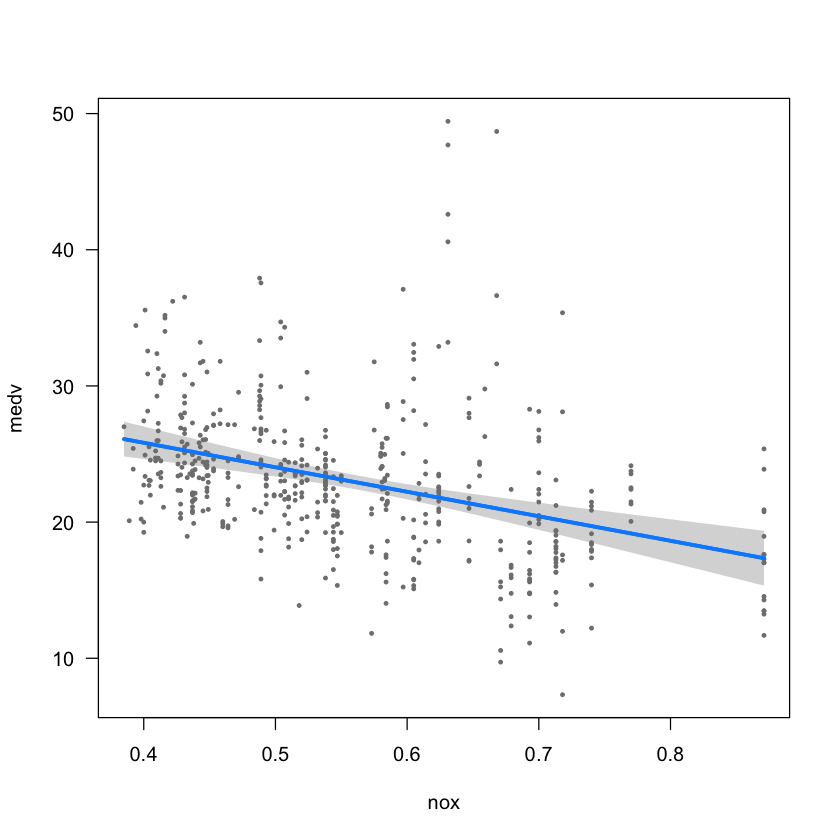

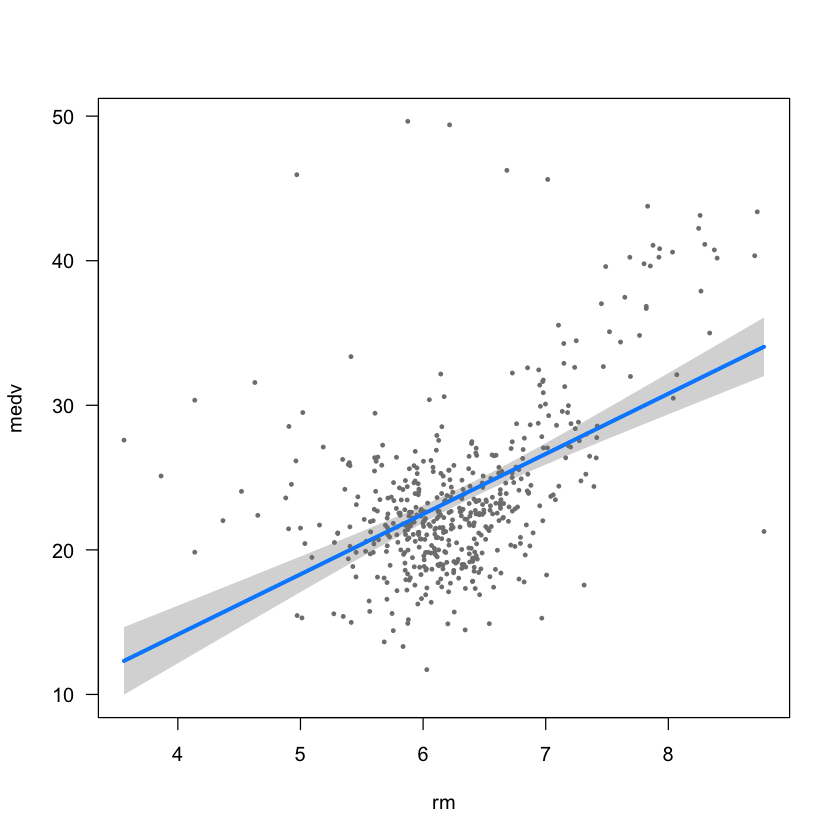

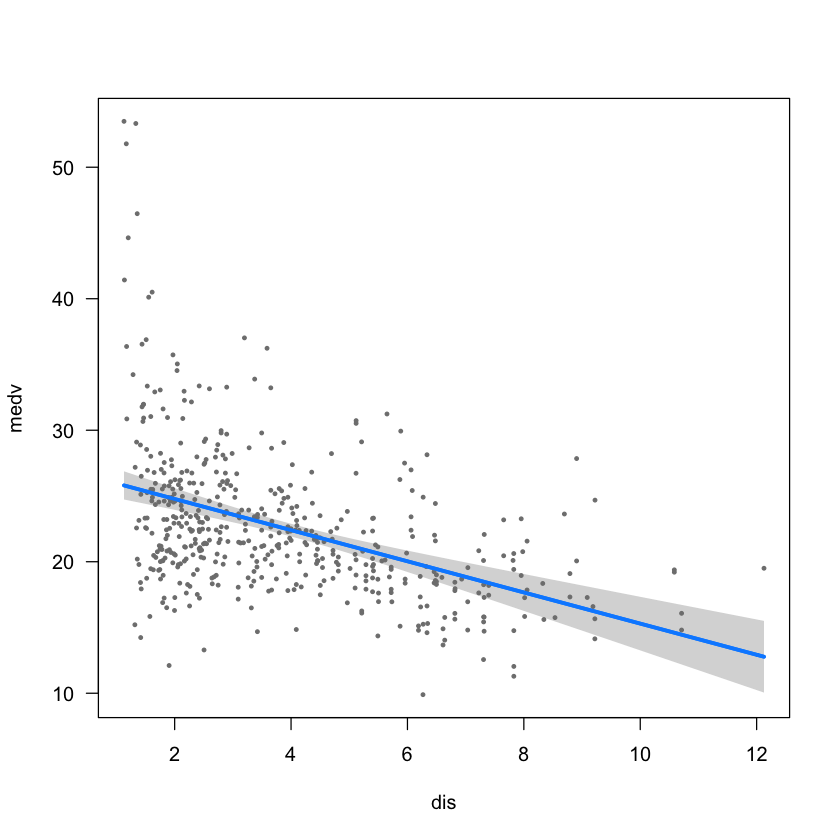

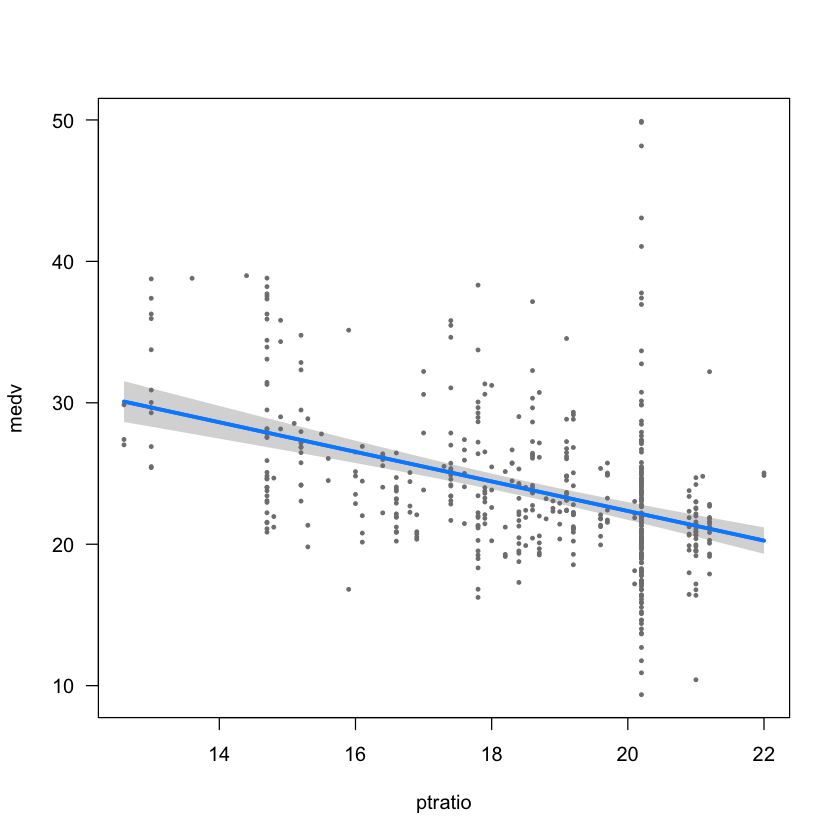

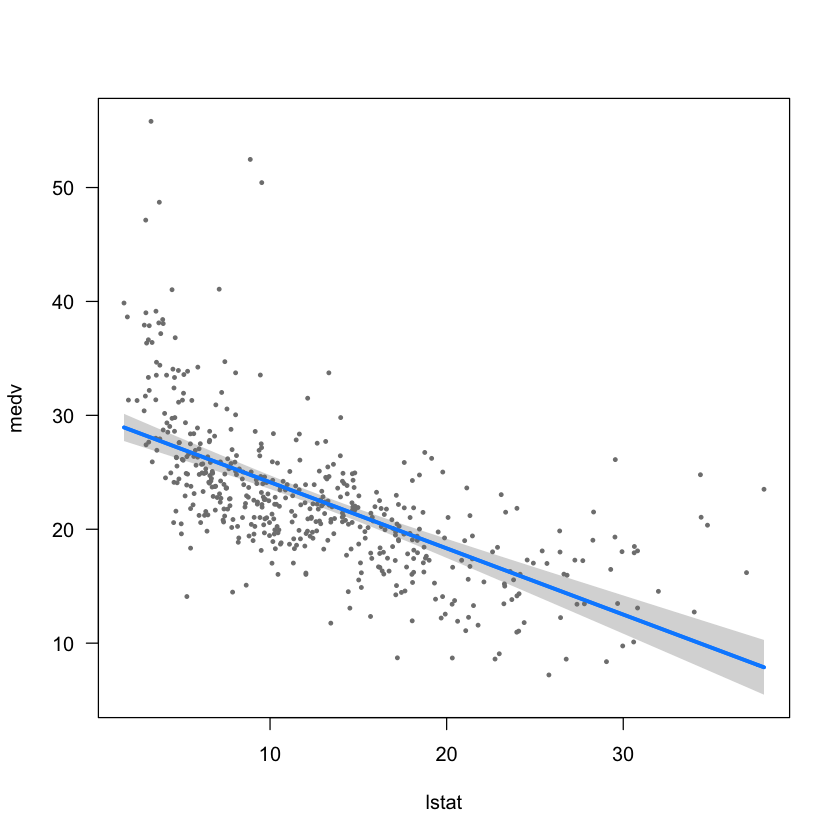

In [10]:
visreg(fit)

**4) Comprueba cómo son los residuos estandarizados. Realiza el ajuste de una normal sobre ellos.** 

In [23]:
standard_res <- rstandard(fit)
final_data <- cbind(Boston, standard_res)
head(final_data[order(-standard_res),], 10)

,X,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,standard_res
369,369,4.89822,0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0,5.683197
373,373,8.26725,0,18.10,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0,5.584693
372,372,9.23230,0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0,5.238672
370,370,5.66998,0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0,4.228701
371,371,6.53876,0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0,3.824787
366,366,4.55587,0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,3.188923
375,375,18.49820,0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8,3.185957
413,413,18.81100,0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9,3.011690
187,187,0.05602,0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0,2.756854
215,215,0.28955,0,10.59,0,0.489,5.412,9.8,3.5875,4,277,18.6,348.93,29.55,23.7,2.709537


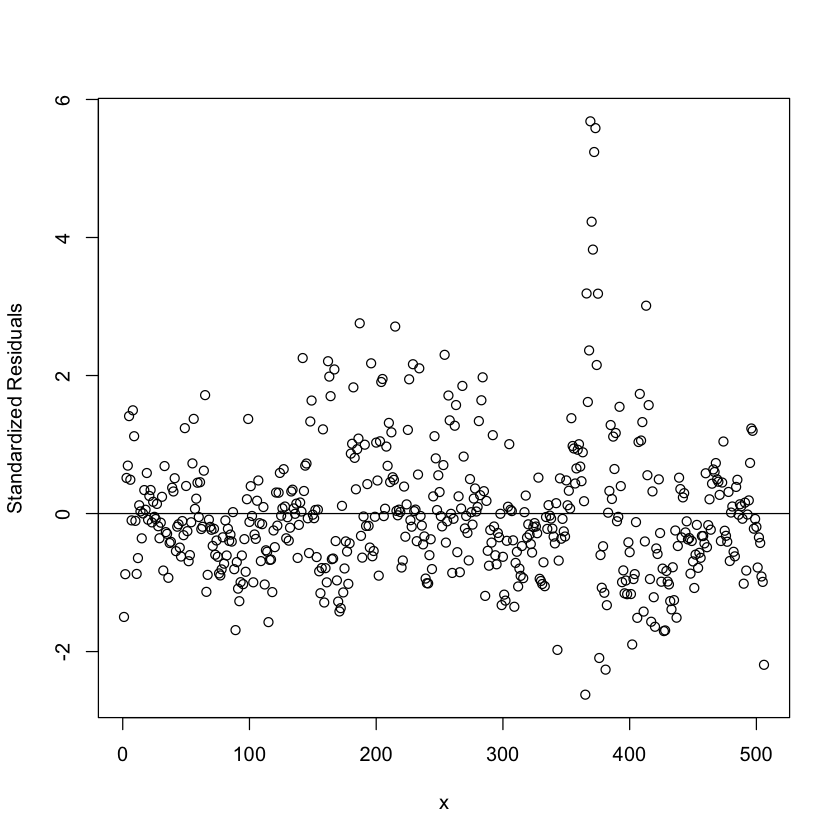

In [22]:
#plot predictor variable vs. standardized residuals
plot(final_data$X, standard_res, ylab='Standardized Residuals', xlab='x') 

#add horizontal line at 0
abline(0, 0)